In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense,Conv2D ,GlobalMaxPooling2D, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from keras import backend as K
import cv2
from tensorflow import keras

In [2]:
os.chdir("/content/drive/MyDrive/Neoland")

In [ ]:
!unzip photos_resized.zip -d photos

In [3]:
path = "/content/drive/MyDrive/Neoland/photos/" #crear path a los directorios
training_data_dir = path + "train1" 
validation_data_dir = path + "validation1" 
test_data_dir = path + "test1" 

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Neoland/photos/train1/7008/70083.jpg')
img.shape

(500, 500, 3)

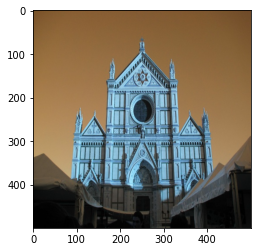

In [ ]:
plt.imshow(img)

In [ ]:
img = np.asarray(img)
print(img.shape)
img = img / 255
print(img.shape)
h_dim = np.shape(img)[0]
w_dim = np.shape(img)[1]
num_channel = np.shape(img)[2]
img = img.reshape(1, h_dim, w_dim, num_channel)
print(img.shape)

(500, 500, 3)
(500, 500, 3)
(1, 500, 500, 3)


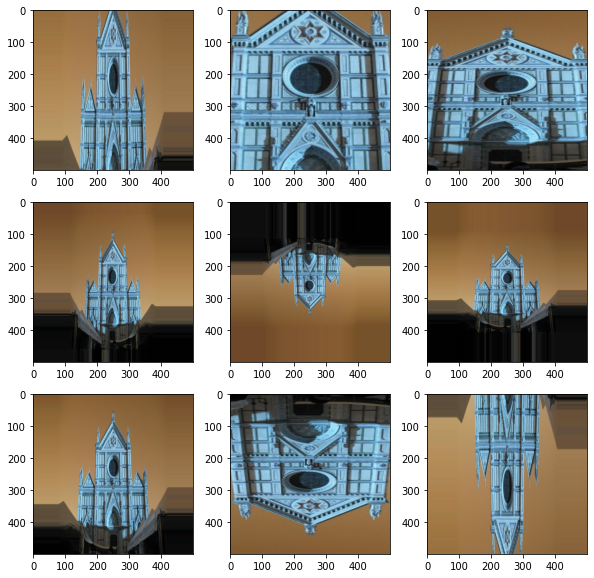

In [ ]:
batch_size=9 
#ImageDataGenerator generates images in different shapes and rotations 

datagen = ImageDataGenerator(
        rotation_range=0,
        shear_range=0,
        zoom_range=1,
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=None)

datagen.fit(img)
plt.figure(figsize=(10,10)) 

for x,img_batch in enumerate(datagen.flow(img, batch_size=9)):
    for img in img_batch:
        plt.subplot(330 + 1 + x)
        plt.imshow(img)
        x+=1    
    if x >= batch_size:
        break
plt.show()

In [4]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=1,
    horizontal_flip=True,
    vertical_flip=True)

validation_data_generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=1,
    horizontal_flip=True,
    vertical_flip=True)

test_data_generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=1,
    horizontal_flip=True,
    vertical_flip=True)

In [11]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,  
    target_size=(500, 500),
    batch_size=9,
    class_mode="categorical")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(500, 500),
    batch_size=9,
    class_mode="categorical", 
    shuffle= False)  
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(500, 500),
    batch_size=1,
    class_mode="categorical") 

Found 8245 images belonging to 10 classes.
Found 703 images belonging to 10 classes.
Found 2852 images belonging to 10 classes.


In [ ]:
#with validation 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=9, padding='same', activation='relu', input_shape=(500,500,3)))
model.add(MaxPooling2D((32, 32)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='sigmoid')) #
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 500, 500, 8)       1952      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                57632     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 59,914
Trainable params: 59,914
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['acc'])

In [ ]:
history = model.fit( 
    training_generator, 
    epochs=5, 
    validation_data=validation_generator, 
    verbose=1)

Epoch 1/5
917/917 [==============================] - 5307s 6s/step - loss: 2.1121 - acc: 0.2490 - val_loss: 1.7182 - val_acc: 0.4410
Epoch 2/5
917/917 [==============================] - 564s 615ms/step - loss: 1.7148 - acc: 0.4251 - val_loss: 1.5788 - val_acc: 0.4651
Epoch 3/5
917/917 [==============================] - 562s 613ms/step - loss: 1.5877 - acc: 0.4771 - val_loss: 1.5639 - val_acc: 0.4637
Epoch 4/5
917/917 [==============================] - 570s 621ms/step - loss: 1.4870 - acc: 0.5069 - val_loss: 1.4075 - val_acc: 0.5405
Epoch 5/5
917/917 [==============================] - 568s 620ms/step - loss: 1.4187 - acc: 0.5259 - val_loss: 1.3974 - val_acc: 0.5562


In [ ]:
predictions=model.predict(test_generator)
yhat = predictions.argmax(axis=-1) 
yhat

array([0, 0, 8, ..., 9, 9, 9])

In [ ]:
predictions[0]

array([0.06884643, 0.016897  , 0.01558066, 0.07989703, 0.00231876,
       0.01550984, 0.68864244, 0.00869108, 0.00819191, 0.09542474],
      dtype=float32)

In [ ]:
y = test_generator.classes #yreal
y

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(yhat,y)

0.5967741935483871

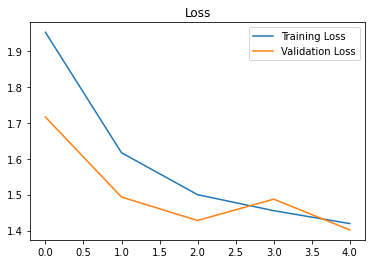

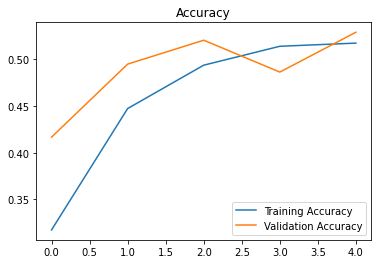

In [ ]:
history = model.history.history

def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
plot_metrics(history)

In [ ]:
#with test generador
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=9, padding='same', activation='relu', input_shape=(500,500,3)))
model.add(MaxPooling2D((16, 16)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='sigmoid')) #
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['acc'])


In [ ]:
%%time
history = model.fit( 
    training_generator, 
    epochs=10, 
    validation_data=test_generator, 
    verbose=1)

Epoch 1/10
917/917 [==============================] - 4103s 4s/step - loss: 2.3090 - acc: 0.1282 - val_loss: 2.2860 - val_acc: 0.1665
Epoch 2/10
917/917 [==============================] - 588s 642ms/step - loss: 2.2408 - acc: 0.1874 - val_loss: 2.1080 - val_acc: 0.2693
Epoch 3/10
917/917 [==============================] - 586s 640ms/step - loss: 2.0093 - acc: 0.2877 - val_loss: 1.9088 - val_acc: 0.3159
Epoch 4/10
917/917 [==============================] - 588s 641ms/step - loss: 1.8226 - acc: 0.3637 - val_loss: 1.8584 - val_acc: 0.3331
Epoch 5/10
917/917 [==============================] - 587s 640ms/step - loss: 1.6747 - acc: 0.4249 - val_loss: 1.5993 - val_acc: 0.4604
Epoch 6/10
917/917 [==============================] - 585s 638ms/step - loss: 1.5678 - acc: 0.4712 - val_loss: 1.5082 - val_acc: 0.4877
Epoch 7/10
917/917 [==============================] - 570s 622ms/step - loss: 1.5148 - acc: 0.4874 - val_loss: 1.5137 - val_acc: 0.4912
Epoch 8/10
917/917 [==============================

With validation generator before removing shuffle

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=9, padding='same', activation='relu', input_shape=(500,500,3)))
model.add(MaxPooling2D((16, 16)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='sigmoid')) #
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['acc'])

In [ ]:
history = model.fit( 
    training_generator, 
    epochs=10, 
    validation_data=validation_generator, 
    verbose=1)

Epoch 1/10
917/917 [==============================] - 661s 721ms/step - loss: 2.3720 - acc: 0.1036 - val_loss: 2.3055 - val_acc: 0.1010
Epoch 2/10
917/917 [==============================] - 469s 511ms/step - loss: 2.3292 - acc: 0.1004 - val_loss: 2.3041 - val_acc: 0.1238
Epoch 3/10
917/917 [==============================] - 468s 511ms/step - loss: 2.3141 - acc: 0.1145 - val_loss: 2.3052 - val_acc: 0.1238
Epoch 4/10
917/917 [==============================] - 468s 511ms/step - loss: 2.3237 - acc: 0.0986 - val_loss: 2.3017 - val_acc: 0.1152
Epoch 5/10
 18/917 [..............................] - ETA: 7:10 - loss: 2.2874 - acc: 0.1417

Set Shuffle in Train and Test but False in Validation 


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(500,500,3)))
model.add(MaxPooling2D((5,5)))
model.add(tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu', input_shape=(500,500,3)))
model.add(MaxPooling2D((5,5)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='sigmoid')) #
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['acc'])


In [ ]:
es = tf.keras.callbacks.EarlyStopping( 
    monitor="val_acc",
    patience=5) 

In [ ]:
history = model.fit( 
    training_generator, 
    epochs=10, 
    validation_data=validation_generator, 
    callbacks = es, 
    verbose=1)

Epoch 1/10
917/917 [==============================] - 3688s 4s/step - loss: 1.9905 - acc: 0.3071 - val_loss: 1.4827 - val_acc: 0.5036
Epoch 2/10
917/917 [==============================] - 449s 489ms/step - loss: 1.4505 - acc: 0.5213 - val_loss: 1.3673 - val_acc: 0.5576
Epoch 3/10
917/917 [==============================] - 445s 485ms/step - loss: 1.2568 - acc: 0.5876 - val_loss: 1.1208 - val_acc: 0.6230
Epoch 4/10
917/917 [==============================] - 446s 486ms/step - loss: 1.1384 - acc: 0.6315 - val_loss: 0.9769 - val_acc: 0.6856
Epoch 5/10
917/917 [==============================] - 452s 493ms/step - loss: 1.0316 - acc: 0.6586 - val_loss: 1.0421 - val_acc: 0.6430
Epoch 6/10
917/917 [==============================] - 445s 486ms/step - loss: 0.9776 - acc: 0.6811 - val_loss: 0.9583 - val_acc: 0.6871
Epoch 7/10
917/917 [==============================] - 448s 488ms/step - loss: 0.9383 - acc: 0.6965 - val_loss: 0.9711 - val_acc: 0.6785
Epoch 8/10
917/917 [==============================

In [ ]:
os.chdir('/content/drive/MyDrive/Neoland')
model.save('red1.h5')

In [6]:
model2 = keras.models.load_model('red1.h5')

In [12]:
predictions=model2.predict(test_generator)
yhat = predictions.argmax(axis=-1) 
yhat

array([0, 0, 8, ..., 6, 9, 9])

In [13]:
y = test_generator.classes #yreal
y

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [ ]:
y_map = test_generator.class_indices 

y_map

{'12647': 0,
 '1310': 1,
 '13332': 2,
 '13876': 3,
 '1472': 4,
 '152': 5,
 '1602': 6,
 '165': 7,
 '7000': 8,
 '7008': 9}

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(yhat,y)

0.6963534361851332

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y, yhat, digits=3)) 

              precision    recall  f1-score   support

           0      0.854     0.533     0.656       242
           1      0.628     0.588     0.607       250
           2      0.719     0.775     0.746       284
           3      0.613     0.504     0.553       264
           4      0.885     0.857     0.871       322
           5      0.718     0.477     0.573       266
           6      0.887     0.848     0.867       315
           7      0.826     0.749     0.786       350
           8      0.458     0.805     0.584       272
           9      0.574     0.718     0.638       287

    accuracy                          0.696      2852
   macro avg      0.716     0.685     0.688      2852
weighted avg      0.724     0.696     0.698      2852



VGG16 


In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights = "imagenet", include_top=False,input_shape=(500,500,3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(tf.keras.layers.Dense(32, activation='sigmoid')) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['acc'])

In [ ]:
es = tf.keras.callbacks.EarlyStopping( 
    monitor="val_acc",
    patience=5) 

In [ ]:
history = model.fit( 
    training_generator, 
    epochs=10, 
    validation_data=test_generator, 
    callbacks = es, 
    verbose=1)

Epoch 1/10
917/917 [==============================] - 853s 914ms/step - loss: 2.3659 - acc: 0.1097 - val_loss: 2.3016 - val_acc: 0.1227
Epoch 2/10
917/917 [==============================] - 834s 909ms/step - loss: 2.3004 - acc: 0.1157 - val_loss: 2.3008 - val_acc: 0.1227
Epoch 3/10
917/917 [==============================] - 832s 907ms/step - loss: 2.3004 - acc: 0.1280 - val_loss: 2.3001 - val_acc: 0.1227
Epoch 4/10
917/917 [==============================] - 831s 906ms/step - loss: 2.2980 - acc: 0.1196 - val_loss: 2.3001 - val_acc: 0.1104
Epoch 5/10
917/917 [==============================] - 830s 904ms/step - loss: 2.3019 - acc: 0.1107 - val_loss: 2.2999 - val_acc: 0.1104
Epoch 6/10
917/917 [==============================] - 832s 907ms/step - loss: 2.3000 - acc: 0.1153 - val_loss: 2.2995 - val_acc: 0.1227


VGG19


In [ ]:
from tensorflow.keras.applications import VGG19
base_model = VGG19(weights = "imagenet", include_top=False,input_shape=(500,500,3))

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=['acc'])

es = tf.keras.callbacks.EarlyStopping( 
    monitor="val_acc",
    patience=5) 

In [ ]:
%%time
history = model.fit( 
    training_generator, 
    epochs=10, 
    validation_data=test_generator, 
    callbacks = es, 
    verbose=1)

Epoch 1/10
917/917 [==============================] - 916s 998ms/step - loss: 3.7946 - acc: 0.1095 - val_loss: 2.2963 - val_acc: 0.1227
Epoch 2/10
917/917 [==============================] - 914s 996ms/step - loss: 2.2959 - acc: 0.1185 - val_loss: 2.2967 - val_acc: 0.1227
Epoch 3/10
917/917 [==============================] - 915s 998ms/step - loss: 2.2978 - acc: 0.1175 - val_loss: 2.2966 - val_acc: 0.1227
Epoch 4/10
917/917 [==============================] - 913s 995ms/step - loss: 2.2966 - acc: 0.1257 - val_loss: 2.2967 - val_acc: 0.1227
Epoch 5/10
917/917 [==============================] - 913s 996ms/step - loss: 2.2958 - acc: 0.1237 - val_loss: 2.2964 - val_acc: 0.1227
Epoch 6/10
917/917 [==============================] - 914s 997ms/step - loss: 2.2960 - acc: 0.1240 - val_loss: 2.2964 - val_acc: 0.1227
CPU times: user 1h 54min 17s, sys: 22min 53s, total: 2h 17min 10s
Wall time: 1h 31min 26s


EfficientNet B0 

In [ ]:
!pip install -U efficientnet

     |████████████████████████████████| 51kB 2.3MB/s 


In [ ]:
import efficientnet.keras as efn

In [ ]:
base_model = efn.EfficientNetB0(input_shape = (500, 500, 3), include_top = False, weights = 'imagenet')

16809984/16804768 [==============================] - 2s 0us/step


In [ ]:
for layer in base_model.layers:  #Since we don’t have to train all the layers, we make them non_trainable:
    layer.trainable = False 

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu')) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer =tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),
              loss='categorical_crossentropy',
              metrics=['acc'])

es = tf.keras.callbacks.EarlyStopping( 
    monitor="val_acc",
    patience=5) 

In [ ]:
%%time
history = model.fit( 
    training_generator, 
    epochs=10, 
    validation_data=test_generator, 
    callbacks = es, 
    verbose=1)

Epoch 1/10
917/917 [==============================] - 4156s 4s/step - loss: 1.8995 - acc: 0.4562 - val_loss: 1.6897 - val_acc: 0.6827
Epoch 2/10
917/917 [==============================] - 620s 676ms/step - loss: 1.8000 - acc: 0.6814 - val_loss: 1.7349 - val_acc: 0.7370
Epoch 3/10
917/917 [==============================] - 621s 677ms/step - loss: 2.8086 - acc: 0.7033 - val_loss: 2.3365 - val_acc: 0.7244
Epoch 4/10
917/917 [==============================] - 622s 678ms/step - loss: 3.3288 - acc: 0.7216 - val_loss: 2.4667 - val_acc: 0.7262
Epoch 5/10
917/917 [==============================] - 630s 687ms/step - loss: 3.3089 - acc: 0.7359 - val_loss: 3.4809 - val_acc: 0.7398
Epoch 6/10
917/917 [==============================] - 631s 689ms/step - loss: 4.7949 - acc: 0.7126 - val_loss: 3.7592 - val_acc: 0.7167
Epoch 7/10
917/917 [==============================] - 610s 665ms/step - loss: 4.2776 - acc: 0.7059 - val_loss: 2.7623 - val_acc: 0.7262
Epoch 8/10
917/917 [==============================

In [ ]:
os.chdir('/content/drive/MyDrive/Neoland')
model.save('efficientnetb0_1.h5')

In [ ]:
os.chdir('/content/drive/MyDrive/Neoland')

In [ ]:
model4 = keras.models.load_model('efficientnetb0_1.h5')

In [ ]:
predictions=model4.predict(validation_generator)
yhat = predictions.argmax(axis=-1) 
y = validation_generator.classes

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, yhat, digits=3)) 

              precision    recall  f1-score   support

           0      0.678     0.702     0.690        57
           1      0.305     0.833     0.446        60
           2      0.956     0.597     0.735        72
           3      0.960     0.750     0.842        64
           4      0.880     0.815     0.846        81
           5      0.952     0.615     0.748        65
           6      0.909     0.811     0.857        74
           7      0.938     0.690     0.795        87
           8      0.871     0.750     0.806        72
           9      0.816     0.873     0.844        71

    accuracy                          0.744       703
   macro avg      0.826     0.744     0.761       703
weighted avg      0.839     0.744     0.769       703



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(yhat,y)

0.7439544807965861

EfficientNetB7

In [ ]:
!pip install -U efficientnet

In [ ]:
import efficientnet.keras as efn

In [ ]:
base_model = efn.EfficientNetB7(input_shape = (500, 500, 3), include_top = False, weights = 'imagenet')

258441216/258434480 [==============================] - 13s 0us/step


In [ ]:
for layer in base_model.layers:  #Since we don’t have to train all the layers, we make them non_trainable:
    layer.trainable = False 

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu')) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer =tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),
              loss='categorical_crossentropy',
              metrics=['acc'])

es = tf.keras.callbacks.EarlyStopping( 
    monitor="val_acc",
    patience=5) 

In [ ]:
checkpoint_filepath = "/content/drive/MyDrive/Neoland/efficientnetb7_1.h5" #hacer que se guarda el mejor modelo con mejores weights y val acc 
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

In [ ]:
%%time  #run out of GPU
history = model.fit( 
    training_generator, 
    epochs=10, 
    validation_data=test_generator, 
    callbacks = [es,callback],
    verbose=1)

Epoch 1/15
148/917 [===>..........................] - ETA: 4:34:45 - loss: 9.0794 - acc: 0.2128

Red2 

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16,(3,3), padding='same', activation='relu', input_shape=(500,500,3)))
model.add(MaxPooling2D((5,5)))
model.add(tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(500,500,3)))
model.add(MaxPooling2D((5,5)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='sigmoid')) #
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(lr=0.0013969),
            metrics=['acc'])


In [ ]:
es = tf.keras.callbacks.EarlyStopping( 
    monitor="val_acc",
    patience=5) 

In [ ]:
history = model.fit( 
    training_generator, 
    epochs=20, 
    validation_data=test_generator, 
    callbacks = es, 
    verbose=1)

Epoch 1/20
917/917 [==============================] - 3750s 4s/step - loss: 1.9472 - acc: 0.3201 - val_loss: 1.5117 - val_acc: 0.5025
Epoch 2/20
917/917 [==============================] - 563s 614ms/step - loss: 1.4341 - acc: 0.5260 - val_loss: 1.2941 - val_acc: 0.5670
Epoch 3/20
917/917 [==============================] - 560s 611ms/step - loss: 1.2405 - acc: 0.5889 - val_loss: 1.2285 - val_acc: 0.5982
Epoch 4/20
917/917 [==============================] - 570s 621ms/step - loss: 1.1457 - acc: 0.6192 - val_loss: 1.0829 - val_acc: 0.6417
Epoch 5/20
917/917 [==============================] - 561s 612ms/step - loss: 1.0657 - acc: 0.6518 - val_loss: 1.0835 - val_acc: 0.6378
Epoch 6/20
917/917 [==============================] - 563s 614ms/step - loss: 1.0514 - acc: 0.6578 - val_loss: 0.9967 - val_acc: 0.6722
Epoch 7/20
917/917 [==============================] - 564s 615ms/step - loss: 1.0162 - acc: 0.6690 - val_loss: 1.0550 - val_acc: 0.6483
Epoch 8/20
917/917 [==============================

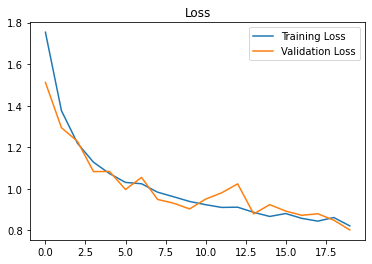

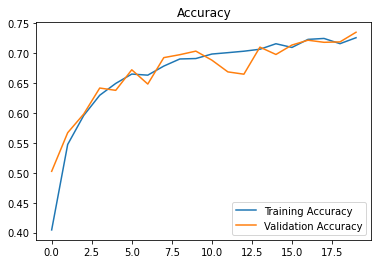

In [ ]:
history = model.history.history

def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
plot_metrics(history)

In [ ]:
os.chdir("/content/drive/MyDrive/Neoland")
model.save('red2.h5')

Resnet40

In [ ]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(input_shape=(500, 500,3), include_top=False, weights="imagenet")

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(tf.keras.layers.Dropout(0.20))
base_model.add(Dense(10, activation='softmax'))

base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])

es = tf.keras.callbacks.EarlyStopping( 
    monitor="val_acc",
    patience=15) 

checkpoint_filepath = "/content/drive/MyDrive/Neoland/resnet_best.h5" #hacer que se guarda el mejor modelo con mejores weights y val acc 
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

In [ ]:
%%time
history = base_model.fit( 
    training_generator, 
    epochs=40, steps_per_epoch = 200,
    validation_data=test_generator, 
    callbacks = [es,callback], 
    verbose=1)

Epoch 1/40
200/200 [==============================] - 303s 1s/step - loss: 14.8376 - acc: 0.1621 - val_loss: 5.9963 - val_acc: 0.0736
Epoch 2/40
200/200 [==============================] - 301s 2s/step - loss: 8.4761 - acc: 0.3161 - val_loss: 10.6078 - val_acc: 0.1462
Epoch 3/40
200/200 [==============================] - 300s 2s/step - loss: 6.1625 - acc: 0.4263 - val_loss: 10.0671 - val_acc: 0.2251
Epoch 4/40
200/200 [==============================] - 299s 1s/step - loss: 4.2899 - acc: 0.5433 - val_loss: 5.2549 - val_acc: 0.4414
Epoch 5/40
200/200 [==============================] - 298s 1s/step - loss: 3.5106 - acc: 0.6289 - val_loss: 2.9402 - val_acc: 0.6255
Epoch 6/40
200/200 [==============================] - 298s 1s/step - loss: 3.0723 - acc: 0.6602 - val_loss: 1.5884 - val_acc: 0.7854
Epoch 7/40
200/200 [==============================] - 295s 1s/step - loss: 2.7951 - acc: 0.6884 - val_loss: 1.0798 - val_acc: 0.8356
Epoch 8/40
200/200 [==============================] - 295s 1s/step

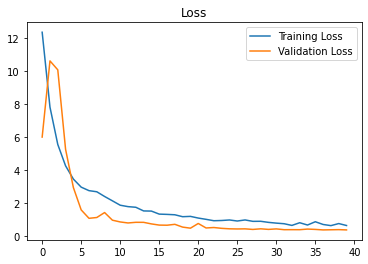

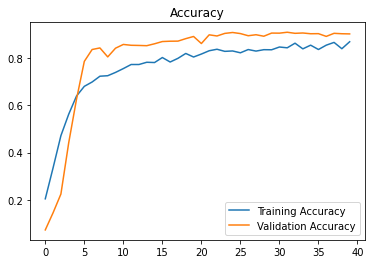

In [ ]:
history = base_model.history.history

def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
plot_metrics(history)

In [ ]:
os.chdir("/content/drive/MyDrive/Neoland")
base_model.save('resnet40.h5')

In [ ]:
model = keras.models.load_model('resnet40.h5')

In [ ]:
predictions=model.predict(validation_generator)
yhat = predictions.argmax(axis=-1) 
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 8, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 6, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2,
       2, 2, 2, 8, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 7, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4,

In [ ]:
y = validation_generator.classes

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, yhat, digits=3)) 

              precision    recall  f1-score   support

           0      0.898     0.930     0.914        57
           1      0.883     0.883     0.883        60
           2      0.957     0.917     0.936        72
           3      0.896     0.938     0.916        64
           4      0.975     0.963     0.969        81
           5      0.882     0.923     0.902        65
           6      0.958     0.932     0.945        74
           7      0.932     0.943     0.937        87
           8      0.926     0.875     0.900        72
           9      0.944     0.958     0.951        71

    accuracy                          0.927       703
   macro avg      0.925     0.926     0.925       703
weighted avg      0.928     0.927     0.928       703



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(yhat,y)

0.9274537695590327

Resnet50 40 epochs

In [ ]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(input_shape=(500, 500,3), include_top=False, weights="imagenet")

94773248/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(tf.keras.layers.Dropout(0.20))
base_model.add(Dense(10, activation='softmax'))

base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])

es = tf.keras.callbacks.EarlyStopping( 
    monitor="val_acc",
    patience=15) 

checkpoint_filepath = "/content/drive/MyDrive/Neoland/resnet_best2.h5" 
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

In [ ]:
%%time
history = base_model.fit( 
    training_generator, 
    epochs=45, steps_per_epoch = 200,
    validation_data=test_generator, 
    callbacks = [es,callback], 
    verbose=1)

Epoch 1/45
200/200 [==============================] - 1545s 8s/step - loss: 13.6185 - acc: 0.1604 - val_loss: 10.0966 - val_acc: 0.0964
Epoch 2/45
200/200 [==============================] - 623s 3s/step - loss: 7.6347 - acc: 0.3625 - val_loss: 9.7725 - val_acc: 0.1045
Epoch 3/45
200/200 [==============================] - 539s 3s/step - loss: 5.2488 - acc: 0.4908 - val_loss: 9.1799 - val_acc: 0.2058
Epoch 4/45
200/200 [==============================] - 482s 2s/step - loss: 4.4379 - acc: 0.5662 - val_loss: 6.7715 - val_acc: 0.3510
Epoch 5/45
200/200 [==============================] - 453s 2s/step - loss: 3.9161 - acc: 0.6070 - val_loss: 3.6500 - val_acc: 0.5884
Epoch 6/45
200/200 [==============================] - 411s 2s/step - loss: 3.4403 - acc: 0.6410 - val_loss: 1.4614 - val_acc: 0.7903
Epoch 7/45
200/200 [==============================] - 381s 2s/step - loss: 3.3529 - acc: 0.6499 - val_loss: 1.1882 - val_acc: 0.8208
Epoch 8/45
200/200 [==============================] - 368s 2s/step

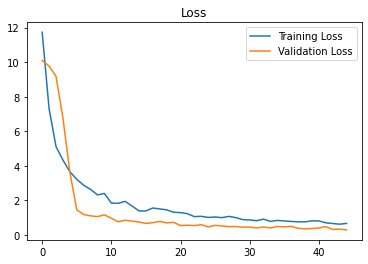

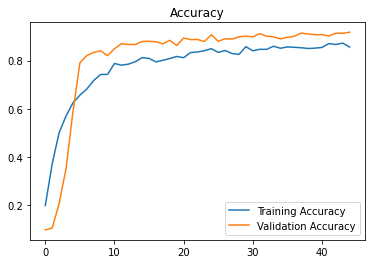

In [ ]:
history = base_model.history.history

def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
plot_metrics(history)

In [ ]:
os.chdir("/content/drive/MyDrive/Neoland")
base_model.save('resnet40_2.h5')

In [ ]:
predictions=base_model.predict(validation_generator)
yhat = predictions.argmax(axis=-1) 
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 0,
       8, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 7, 2, 2, 2, 7, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 3, 1, 3, 3, 8,
       1, 3, 3, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
y = validation_generator.classes

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, yhat, digits=3)) 

              precision    recall  f1-score   support

           0      0.914     0.930     0.922        57
           1      0.869     0.883     0.876        60
           2      0.971     0.917     0.943        72
           3      0.905     0.891     0.898        64
           4      0.988     1.000     0.994        81
           5      0.918     0.862     0.889        65
           6      1.000     0.946     0.972        74
           7      0.910     0.931     0.920        87
           8      0.882     0.931     0.905        72
           9      0.920     0.972     0.945        71

    accuracy                          0.929       703
   macro avg      0.928     0.926     0.926       703
weighted avg      0.930     0.929     0.929       703



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(yhat,y)

0.9288762446657184